<a href="https://colab.research.google.com/github/kumarsujal23/flightdelay_prediction/blob/main/delayflight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
path="/content/drive/My Drive/Azad_data/flights_sample_3m.csv" # Defining the path to the dataset file
df=pd.read_csv(path)  #Loading the dataset into a pandas DataFrame
actual_df = df.copy()
pd.set_option('display.max_columns',None) #Making a copy of the original dataset for reference and backup
df.head(5)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(533863, 31)

In [ ]:
df.describe()


,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,3.000000e+06,3.000000e+06,3.000000e+06,2.922385e+06,2.922356e+06,2.921194e+06,2.921194e+06,2.920056e+06,2.920056e+06,3.000000e+06,2.920058e+06,2.913802e+06,3.000000e+06,3.000000e+06,2.999986e+06,2.913802e+06,2.913802e+06,3.000000e+06,533863.000000,533863.000000,533863.000000,533863.000000,533863.000000
mean,1.997629e+04,2.511536e+03,1.327062e+03,1.329776e+03,1.012333e+01,1.664305e+01,1.352361e+03,1.462500e+03,7.678982e+00,1.490561e+03,1.466511e+03,4.260858e+00,2.638000e-02,2.352000e-03,1.422758e+02,1.366205e+02,1.123108e+02,8.093616e+02,24.759086,3.985260,13.164728,0.145931,25.471282
std,3.772846e+02,1.747258e+03,4.858789e+02,4.993101e+02,4.925183e+01,9.192901e+00,5.008727e+02,5.272368e+02,6.269639e+00,5.115476e+02,5.318383e+02,5.117482e+01,1.602626e-01,4.844036e-02,7.155669e+01,7.167582e+01,6.975484e+01,5.878939e+02,71.771845,32.410796,33.161122,3.582053,55.766892
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.600000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,8.000000e+00,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.979000e+04,1.051000e+03,9.150000e+02,9.160000e+02,-6.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.107000e+03,1.053000e+03,-1.600000e+01,0.000000e+00,0.000000e+00,9.000000e+01,8.400000e+01,6.100000e+01,3.770000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.993000e+04,2.152000e+03,1.320000e+03,1.323000e+03,-2.000000e+00,1.400000e+01,1.336000e+03,1.501000e+03,6.000000e+00,1.516000e+03,1.505000e+03,-7.000000e+00,0.000000e+00,0.000000e+00,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,4.000000,0.000000,0.000000,0.000000,0.000000
75%,2.036800e+04,3.797000e+03,1.730000e+03,1.739000e+03,6.000000e+00,1.900000e+01,1.752000e+03,1.908000e+03,9.000000e+00,1.919000e+03,1.913000e+03,7.000000e+00,0.000000e+00,0.000000e+00,1.720000e+02,1.670000e+02,1.420000e+02,1.046000e+03,23.000000,0.000000,17.000000,0.000000,30.000000
max,2.045200e+04,9.562000e+03,2.359000e+03,2.400000e+03,2.966000e+03,1.840000e+02,2.400000e+03,2.400000e+03,2.490000e+02,2.400000e+03,2.400000e+03,2.934000e+03,1.000000e+00,1.000000e+00,7.050000e+02,7.390000e+02,6.920000e+02,5.812000e+03,2934.000000,1653.000000,1741.000000,1185.000000,2557.000000


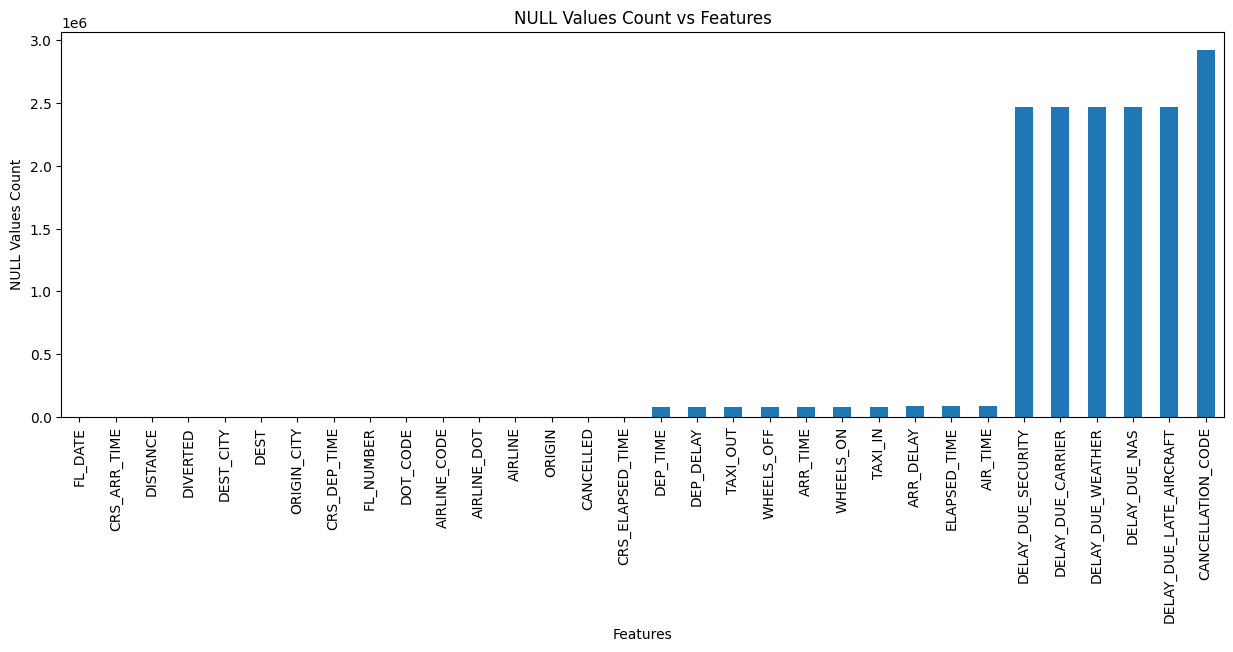

In [ ]:
plt.figure(figsize=(15,5))
((df.isnull().sum())).sort_values(ascending=True).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('NULL Values Count')
plt.title('NULL Values Count vs Features')
plt.show()

In [ ]:
#Drop those rows where arr delay is nan
df = df.dropna(subset=['ARR_DELAY','DELAY_DUE_WEATHER'])


In [ ]:
df = df.drop('CANCELLATION_CODE',axis=1)
df['FL_DATE']= pd.to_datetime(df['FL_DATE'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533863 entries, 3 to 2999997
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   FL_DATE                  533863 non-null  datetime64[ns]
 1   AIRLINE                  533863 non-null  object        
 2   AIRLINE_DOT              533863 non-null  object        
 3   AIRLINE_CODE             533863 non-null  object        
 4   DOT_CODE                 533863 non-null  int64         
 5   FL_NUMBER                533863 non-null  int64         
 6   ORIGIN                   533863 non-null  object        
 7   ORIGIN_CITY              533863 non-null  object        
 8   DEST                     533863 non-null  object        
 9   DEST_CITY                533863 non-null  object        
 10  CRS_DEP_TIME             533863 non-null  int64         
 11  DEP_TIME                 533863 non-null  float64       
 12  DEP_DELAY           

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
(df['ARR_DELAY'] == df['DELAY_DUE_WEATHER']+df['DELAY_DUE_NAS']+df['DELAY_DUE_SECURITY']+df['DELAY_DUE_LATE_AIRCRAFT']+df['DELAY_DUE_CARRIER']).value_counts()

,count
True,533863


In [ ]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [ ]:
df2=df.drop(columns=['AIRLINE','AIRLINE_DOT','AIRLINE_CODE','ORIGIN_CITY','DEST_CITY','DIVERTED','CANCELLED'])

In [ ]:
df2['DAY'] = df2['FL_DATE'].dt.day
df2['MONTH'] = df2['FL_DATE'].dt.month

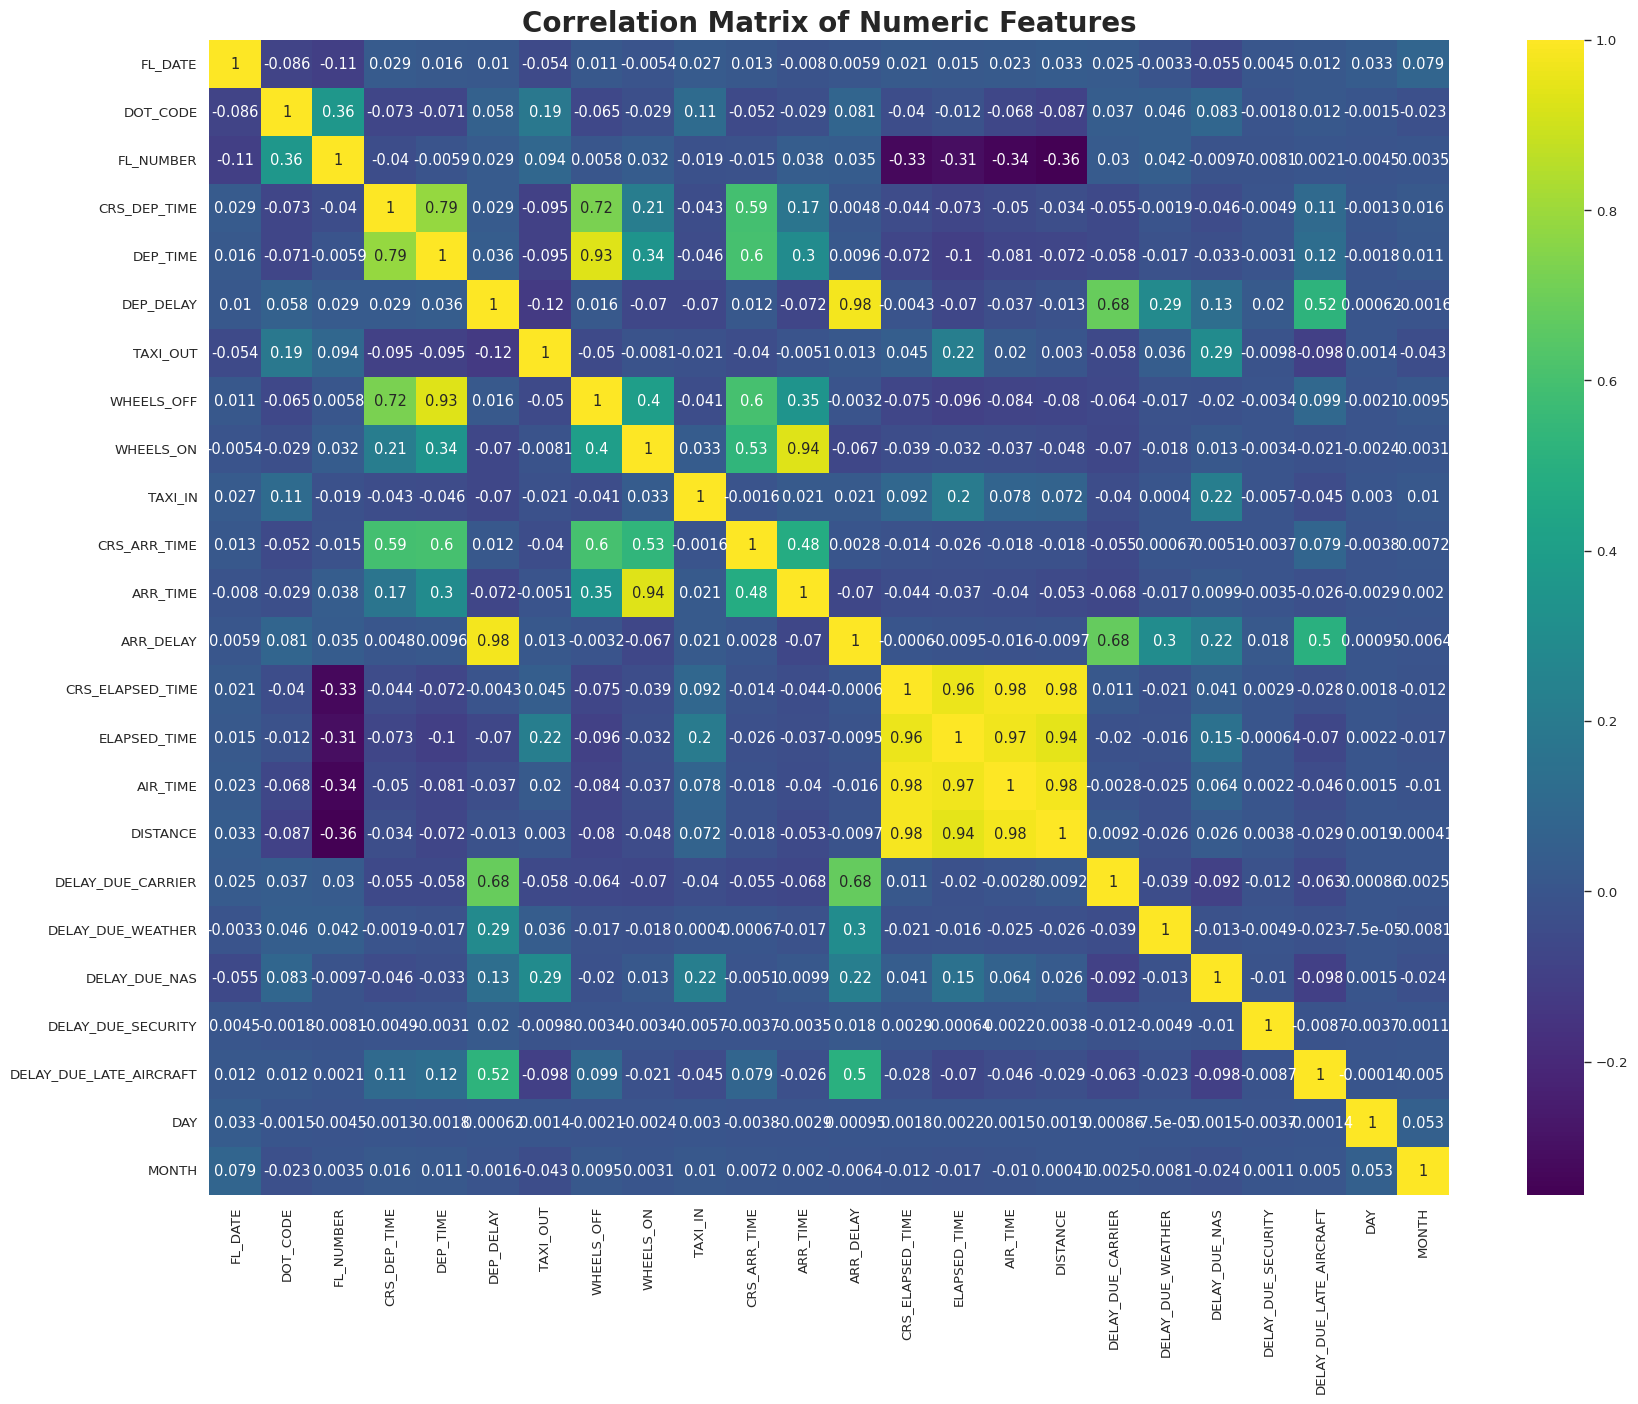

In [ ]:
numeric_features = [feature for feature in df2.columns if df2[feature].dtype not in ['O', 'bool'] ]
plt.figure(figsize=(20, 15))
sns.set_context('paper', font_scale=1.1)
sns.set_style('whitegrid')
numeric_df = df2[numeric_features]
asteroid_matrix = numeric_df.corr()

sns.heatmap(asteroid_matrix, annot=True, cmap='viridis')

plt.title('Correlation Matrix of Numeric Features', fontsize=20, fontweight='bold')
plt.show()

In [ ]:
df2[['DELAY_DUE_WEATHER','DELAY_DUE_CARRIER','DELAY_DUE_NAS','DELAY_DUE_LATE_AIRCRAFT','DELAY_DUE_SECURITY']].describe()

,DELAY_DUE_WEATHER,DELAY_DUE_CARRIER,DELAY_DUE_NAS,DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_SECURITY
count,533863.000000,533863.000000,533863.000000,533863.000000,533863.000000
mean,3.985260,24.759086,13.164728,25.471282,0.145931
std,32.410796,71.771845,33.161122,55.766892,3.582053
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,0.000000,0.000000,0.000000
75%,0.000000,23.000000,17.000000,30.000000,0.000000
max,1653.000000,2934.000000,1741.000000,2557.000000,1185.000000


In [ ]:
(df2[['DELAY_DUE_WEATHER','DELAY_DUE_CARRIER','DELAY_DUE_NAS','DELAY_DUE_LATE_AIRCRAFT','DELAY_DUE_SECURITY']]==0).sum()

,0
DELAY_DUE_WEATHER,502435
DELAY_DUE_CARRIER,236912
DELAY_DUE_NAS,277386
DELAY_DUE_LATE_AIRCRAFT,274849
DELAY_DUE_SECURITY,531104


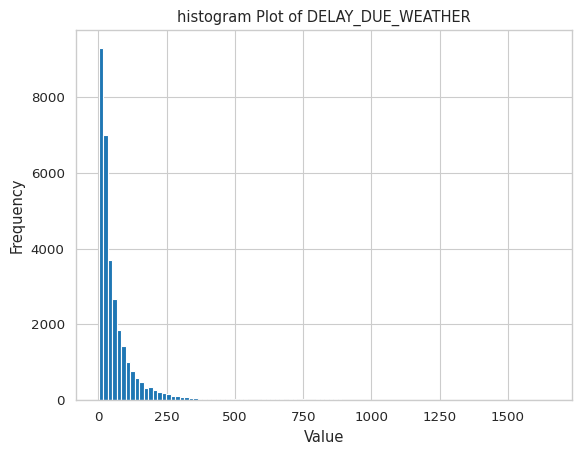

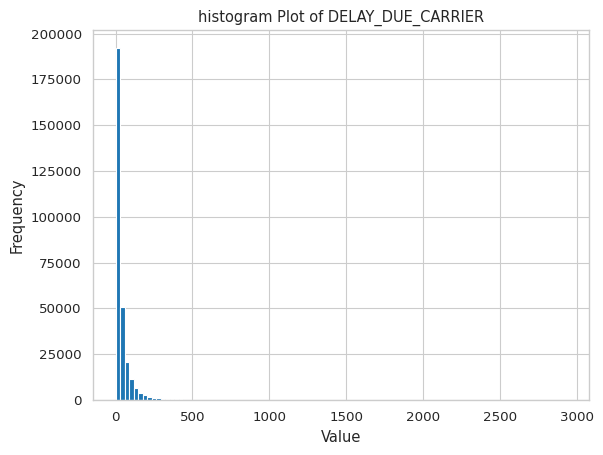

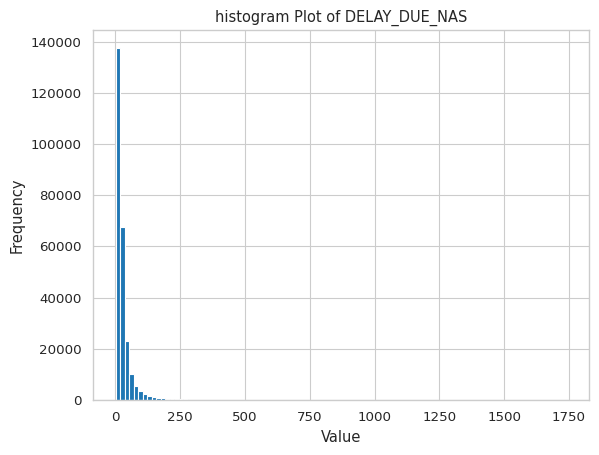

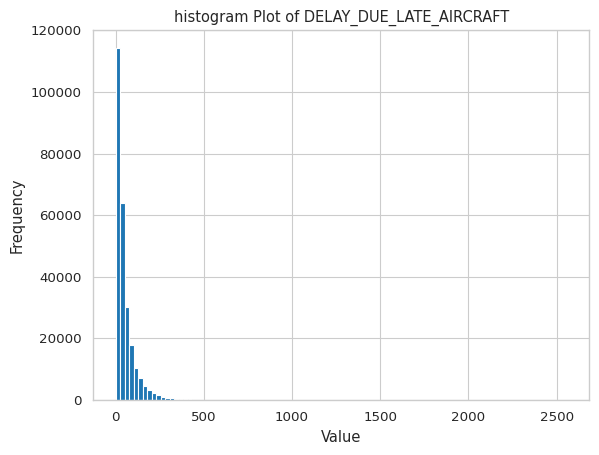

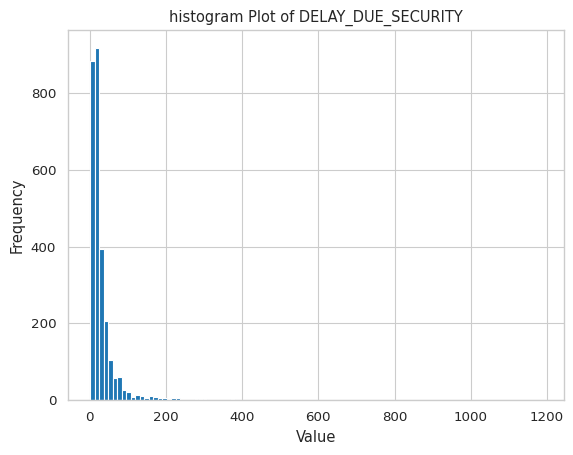

In [ ]:
for column in df2[['DELAY_DUE_WEATHER','DELAY_DUE_CARRIER','DELAY_DUE_NAS','DELAY_DUE_LATE_AIRCRAFT','DELAY_DUE_SECURITY']].columns:
     plt.figure()
     df2[df2[column] > 0][column].hist(bins=100)
     plt.title(f'histogram Plot of {column}')
     plt.xlabel('Value')
     plt.ylabel('Frequency')
     plt.show()

In [ ]:
(df2[df2[['DELAY_DUE_WEATHER','DELAY_DUE_CARRIER','DELAY_DUE_NAS','DELAY_DUE_LATE_AIRCRAFT','DELAY_DUE_SECURITY','TAXI_IN','TAXI_OUT']]>0])[['DELAY_DUE_WEATHER','DELAY_DUE_CARRIER','DELAY_DUE_NAS','DELAY_DUE_LATE_AIRCRAFT','DELAY_DUE_SECURITY','TAXI_IN','TAXI_OUT']].describe()

,DELAY_DUE_WEATHER,DELAY_DUE_CARRIER,DELAY_DUE_NAS,DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_SECURITY,TAXI_IN,TAXI_OUT
count,31428.000000,296951.000000,256477.000000,259014.000000,2759.000000,533863.000000,533863.000000
mean,67.697054,44.512260,27.402695,52.499768,28.237405,9.429814,21.632426
std,116.324145,91.551371,43.575371,70.647287,41.111795,10.123430,15.291081
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15.000000,9.000000,8.000000,16.000000,10.000000,4.000000,12.000000
50%,33.000000,20.000000,17.000000,31.000000,18.000000,6.000000,17.000000
75%,74.000000,44.000000,30.000000,64.000000,31.000000,10.000000,25.000000
max,1653.000000,2934.000000,1741.000000,2557.000000,1185.000000,249.000000,184.000000


In [ ]:
# weather - cat;
# nas - cat;
# security + day - num (seasonal);
# late aircraft - num;
######## carrier - num;

<ipython-input-14-4c92dbb5dc94>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_delay = df2['DELAY_DUE_LATE_AIRCRAFT'].resample('M').mean()


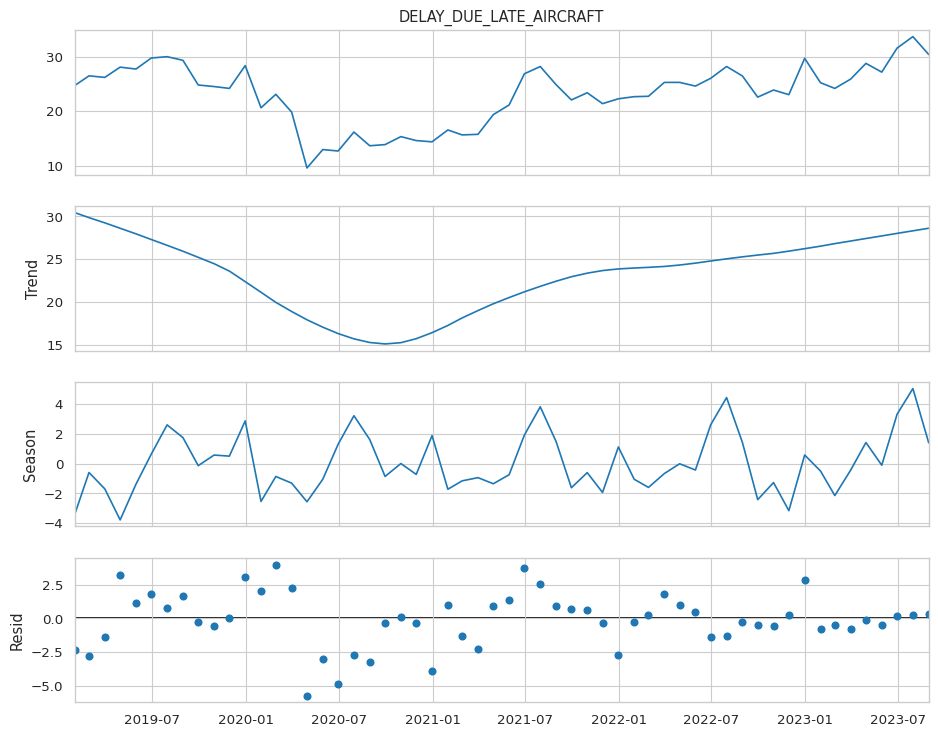

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Assuming your DataFrame is named 'df' and has columns 'YEAR', 'MONTH', 'DAY', and 'DELAY'
# Create a 'DATE' column for sorting and easier time series handling

df2 = df2.sort_values(by='FL_DATE').reset_index(drop=True)

# Set the 'DATE' as the index for easier time series manipulation
df2.set_index('FL_DATE', inplace=True)

# Resample data monthly for better seasonality analysis if needed
monthly_delay = df2['DELAY_DUE_LATE_AIRCRAFT'].resample('M').mean()

# Perform STL decomposition
stl = STL(monthly_delay, seasonal=13)  # Adjust 'seasonal' based on the frequency of your seasonality
result = stl.fit()

# Plotting the components
fig = result.plot()
fig.set_size_inches(10, 8)
plt.show()


<ipython-input-15-160c1fb4aea6>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_delay = df2['ARR_DELAY'].resample('M').mean()


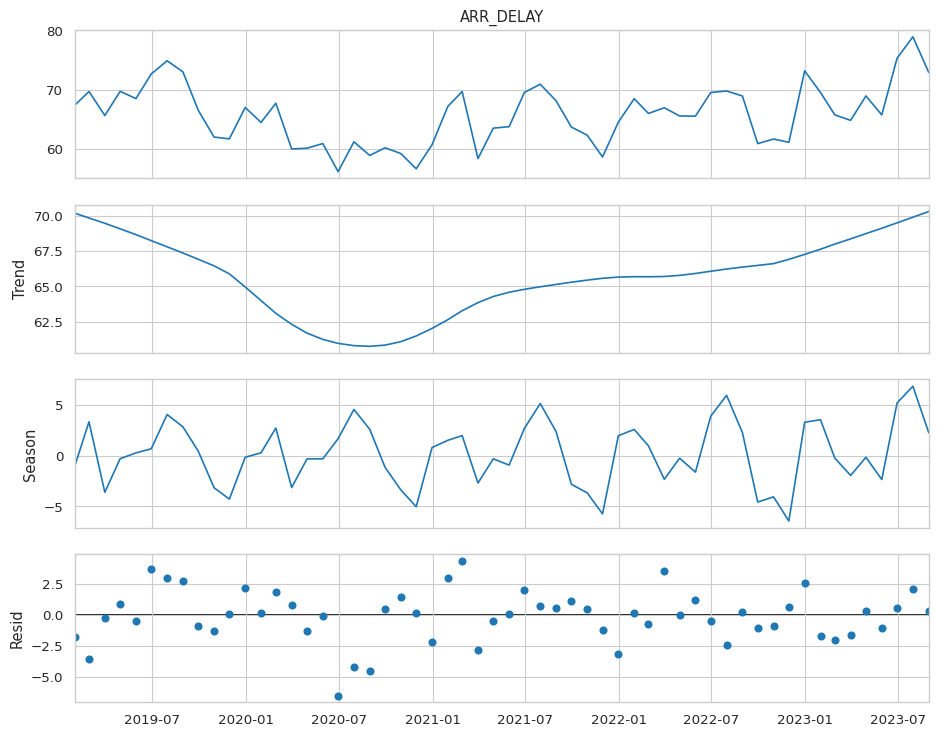

In [ ]:
monthly_delay = df2['ARR_DELAY'].resample('M').mean()

# Perform STL decomposition
stl = STL(monthly_delay, seasonal=13)  # Adjust 'seasonal' based on the frequency of your seasonality
result = stl.fit()

# Plotting the components
fig = result.plot()
fig.set_size_inches(10, 8)
plt.show()

In [ ]:
df2.head(5)

,DOT_CODE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,DAY,MONTH,DELAY
FL_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,19805,2465,ORD,LAS,2030,2140.0,70.0,14.0,2154.0,2328.0,6.0,2237,2334.0,57.0,247.0,234.0,214.0,1514.0,11.0,0.0,0.0,0.0,46.0,1,1,57.0
2019-01-01,20304,2965,ASE,LAX,2000,2228.0,148.0,28.0,2256.0,2327.0,12.0,2124,2339.0,135.0,144.0,131.0,91.0,737.0,54.0,0.0,0.0,0.0,81.0,1,1,135.0
2019-01-01,20304,4960,FAR,MSP,1326,1756.0,270.0,14.0,1810.0,1853.0,6.0,1440,1859.0,259.0,74.0,63.0,43.0,223.0,0.0,0.0,0.0,0.0,259.0,1,1,259.0
2019-01-01,19805,2809,MIA,LGA,1533,1647.0,74.0,16.0,1703.0,1921.0,6.0,1830,1927.0,57.0,177.0,160.0,138.0,1096.0,57.0,0.0,0.0,0.0,0.0,1,1,57.0
2019-01-01,20366,4428,ORD,CMH,1430,1505.0,35.0,61.0,1606.0,1758.0,8.0,1652,1806.0,74.0,82.0,121.0,52.0,296.0,5.0,0.0,39.0,0.0,30.0,1,1,74.0


In [ ]:
df3=df2.copy()

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame `df` with a 'DATE' column and target columns 'feature1', 'feature2', and 'feature3'

# Select the last year's worth of data
last_year = df2.index[-1].year  # Get the most recent year
# Corrected line: Using df2.index instead of df.index
df2 = df2[(df2.index >= pd.to_datetime(f'{last_year}-01-01')) & (df2.index < pd.to_datetime(f'{last_year + 1}-01-01'))]

# Adding month and day as features
df2['month'] = df2.index.month
df2['day'] = df2.index.day

# Scaling the data to be between 0 and 1 for each feature
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df2[['DELAY_DUE_CARRIER', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'month', 'day']])

# Define parameters
look_back = 60  # 60 time steps (e.g., days or months)
num_features = scaled_data.shape[1]  # 5 features in total (3 target features + month + day)

# Prepare the data for LSTM
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back, :3])  # Only predicting 'feature1', 'feature2', 'feature3'
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, look_back)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(100, activation='relu', input_shape=(look_back, num_features)),
    Dense(3)  # Output for 3 target features
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

# Predictions
predictions = model.predict(X_test)

# Inverse scaling for interpretation
predicted_values = scaler.inverse_transform(np.concatenate([predictions, X_test[:, -1, 3:]], axis=1))[:, :3]
actual_values = scaler.inverse_transform(np.concatenate([y_test, X_test[:, -1, 3:]], axis=1))[:, :3]

# Plotting the results for each feature


<ipython-input-18-bed20b490577>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = df2.index.month
<ipython-input-18-bed20b490577>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'] = df2.index.day
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 76s 227ms/step - loss: 5.0071e-04 - val_loss: 5.7611e-04
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 72s 222ms/step - loss: 4.1579e-04 - val_loss: 5.7065e-04
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 73s 222ms/step - loss: 4.5372e-04 - val_loss: 5.6984e-04
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 79s 213ms/step - loss: 4.2736e-04 - val_loss: 5.6705e-04
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 85s 223ms/step - loss: 4.4689e-04 - val_loss: 5.7605e-04
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 79s 214ms/step - loss: 4.2643e-04 - val_loss: 5.6441e-04
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 86s 228ms/step - loss: 4.2819e-04 - val_loss: 5.6319e-04
Epoch 8/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 70s 214ms/step - loss: 4.2084e-04 - val_loss: 5.7333e-04
Epoch 9/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 87s 229ms/step - loss: 4.2084e-04 - val_loss: 5.7113e-04
Epoch 10/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 79s 221ms/step - loss: 4.3768e-04 - val_loss: 5.6337e-04
654/654 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
def categorize_weather_delay(value):
    if value == 0:
        return 0
    elif 0 < value <= 15:
        return 1
    elif 15 < value <= 33:
        return 2
    elif 33 < value <= 74:
        return 3
    else:
        return 4

def categorize_nas_delay(value):
    if value == 0:
        return 0
    elif 0 < value <= 8:
        return 1
    elif 8 < value <= 17:
        return 2
    elif 17 < value <= 30:
        return 3
    else:
        return 4

In [ ]:
df3['DELAY_DUE_WEATHER'] = df3['DELAY_DUE_WEATHER'].apply(categorize_weather_delay)
df3['DELAY_DUE_NAS'] = df3['DELAY_DUE_NAS'].apply(categorize_weather_delay)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
feature_columns = ['DEP_TIME','DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'AIR_TIME', 'DISTANCE',
                   'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
                   'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
X = df3[feature_columns]
y = df3['ARR_DELAY']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
models = {
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(eval_metric="mae", use_label_encoder=False, random_state=42),
    'LGBMRegressor': LGBMRegressor(random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mae = mean_absolute_error(y_test, predictions)
    results[name] = mae

# Display results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'MAE']).sort_values(by='MAE')
print(results_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:56:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1932
[LightGBM] [Info] Number of data points in the train set: 427090, number of used features: 11
[LightGBM] [Info] Start training from score 67.541181
                       Model       MAE
0      RandomForestRegressor  2.527464
3              LGBMRegressor  4.023765
2               XGBRegressor  4.205641
1  GradientBoostingRegressor  5.468299


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
predictions = model.predict(X)
df3['PREDICTED_DELAY'] = predictions

In [ ]:
df3.head(5)

,FL_DATE,DOT_CODE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,DAY,MONTH,PREDICTED_DELAY
3,2023-03-06,19790,2295,MSP,SFO,1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,260.0,285.0,249.0,1589.0,0.0,0,2,0.0,0.0,6,3,23.12
5,2019-07-31,19393,665,DAL,OKC,1010,1237.0,147.0,15.0,1252.0,1328.0,3.0,1110,1331.0,141.0,60.0,54.0,36.0,181.0,141.0,0,0,0.0,0.0,31,7,141.00
7,2019-07-08,20452,4464,HSV,DCA,1643,1637.0,-6.0,22.0,1659.0,1927.0,41.0,1945,2008.0,23.0,122.0,151.0,88.0,613.0,0.0,0,2,0.0,0.0,8,7,21.67
10,2021-06-11,19790,2820,ATL,BDL,1850,1959.0,69.0,14.0,2013.0,2208.0,4.0,2112,2212.0,60.0,142.0,133.0,115.0,859.0,60.0,0,0,0.0,0.0,11,6,60.00
19,2019-03-17,19977,1157,SRQ,ORD,1615,1611.0,-4.0,31.0,1642.0,1838.0,12.0,1815,1850.0,35.0,180.0,219.0,176.0,1050.0,0.0,0,3,0.0,0.0,17,3,36.15


In [ ]:
import pandas as pd
import numpy as np
import random

# Function to convert minutes into HHMM format
def convert_to_hhmm(minutes):
    hours = (minutes // 100) % 24  # Extract hours and wrap at 24
    minutes = minutes % 100  # Extract minutes and ensure it's less than 60
    return int(hours) * 100 + minutes

# Function to convert HHMM format back to total minutes for calculation
def convert_hhmm_to_minutes(hhmm):
    hours = hhmm // 100
    minutes = hhmm % 100
    return hours * 60 + minutes

# Initial greedy rescheduling
def initial_greedy_schedule(df):
    schedule = []
    for _, row in df.iterrows():
        # Schedule at the earliest time within the predicted delay range
        rescheduled_time = max(row['DEP_TIME'] - row['PREDICTED_DELAY'], 0)
        # Ensure the rescheduled time is in valid HHMM format
        rescheduled_time = convert_to_hhmm(rescheduled_time)
        schedule.append(rescheduled_time)
    df['rescheduled_time'] = schedule
    return df

# Calculate the total delay from the initial schedule
def calculate_total_delay(df):
    total_delay = np.sum(np.abs(df['rescheduled_time'] - df['DEP_TIME']))
    return total_delay

# Simulated Annealing to fine-tune the schedule
def simulated_annealing(df, initial_temp=1000, cooling_rate=0.995, max_iter=5000):
    current_schedule = df['rescheduled_time'].copy()
    best_schedule = current_schedule.copy()
    best_delay = calculate_total_delay(df)
    current_temp = initial_temp

    for i in range(max_iter):
        # Randomly select a flight to adjust
        idx = random.randint(0, len(df) - 1)

        # Generate a new time within the flight's allowed delay range
        original_time = df.iloc[idx]['DEP_TIME']
        max_delay = df.iloc[idx]['PREDICTED_DELAY']

        # Generate new time and convert it to total minutes for calculations
        new_time_minutes = random.randint(original_time - max_delay, original_time + max_delay)

        # Convert the new time back to HHMM format
        new_time_hhmm = convert_to_hhmm(new_time_minutes)

        # Update and calculate new delay
        current_schedule[idx] = new_time_hhmm
        df['rescheduled_time'] = current_schedule
        new_delay = calculate_total_delay(df)

        # Accept or reject the new schedule based on simulated annealing rules
        if new_delay < best_delay:
            best_delay = new_delay
            best_schedule = current_schedule.copy()
        elif np.exp((best_delay - new_delay) / current_temp) > random.random():
            best_delay = new_delay

        # Cooling schedule
        current_temp *= cooling_rate

        # Early stopping if no improvement
        if i % 100 == 0 and new_delay == best_delay:
            break

    df['optimized_schedule'] = best_schedule
    return df

# Apply greedy and simulated annealing to optimize
df3 = initial_greedy_schedule(df3)
df3 = simulated_annealing(df3)

# Print the final optimized schedule
print(df3[['FL_NUMBER', 'ORIGIN', 'FL_DATE', 'DEP_TIME', 'PREDICTED_DELAY', 'optimized_schedule']])


         FL_NUMBER ORIGIN    FL_DATE  DEP_TIME  PREDICTED_DELAY  \
3             2295    MSP 2023-03-06    1608.0            23.12   
5              665    DAL 2019-07-31    1237.0           141.00   
7             4464    HSV 2019-07-08    1637.0            21.67   
10            2820    ATL 2021-06-11    1959.0            60.00   
19            1157    SRQ 2019-03-17    1611.0            36.15   
...            ...    ...        ...       ...              ...   
2999978        569    DTW 2019-11-11    2251.0           314.23   
2999981       5804    SDF 2020-12-28    1300.0            17.16   
2999982       1456    SLC 2023-01-03    1639.0            22.15   
2999988       5243    SFO 2019-04-16    1429.0           212.52   
2999997       2745    HSV 2022-09-11     615.0            37.99   

         optimized_schedule  
3                   1584.88  
5                   1096.00  
7                   1615.33  
10                  1899.00  
19                  1574.85  
...            